### 一、导入数据

In [195]:
import pandas as pd
data=pd.read_csv("Bikeshare_test.csv")
data.head()

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,6.0,56.2083,0.194037,3830.0
1,1,1.0,12.0,0.0,4.0,1.0,2.0,1.0,3.0,65.2917,0.350133,2114.0
2,2,2.0,6.0,0.0,4.0,1.0,2.0,36.0,37.0,56.8333,0.149883,915.0
3,3,1.0,2.0,0.0,1.0,1.0,1.0,8.0,12.0,49.0833,0.268033,4322.0
4,4,2.0,5.0,0.0,0.0,0.0,1.0,28.0,29.0,69.7083,0.215171,6591.0


**data.columns** #查看DataFrame的列名，可以使用.tolist()将其转换为列表    
**data.index** #查看DataFrame的列名，可以使用.tolist()将其转换为列表  

---
上述取索引、取列名的方法可以在对DataFrame的增删改查中灵活运用

---

In [196]:
columns=data.columns.tolist()
print("查看列名称columns：",columns)
print("获取指定(eg:month)列的索引:",columns.index("month"))

查看列名称columns： ['Unnamed: 0', 'season', 'month', 'holiday', 'day_of_week', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']
获取指定(eg:month)列的索引: 2


### 二、增删操作

In [197]:
#在DataFrame最后增加一列
data['My Add']="Test1"#在DataFrame最后添加一列，所有的值都为1。（也可传入列表，但必须保政长度一致）

#在DataFrame中指定位置插入一列
data.insert(2,'My Insert',"Test2") #在第2列，加上column名称为"My Insert"，所有值均为（My Insert）
data.insert(columns.index('holiday')+1,'My Insert2',"Test3") #参数同上，在第holiday列前添加一列（注意holiday的索引+1为其前一列的位置，+2为后一列的位置）

#删除三个参数:索引名称;索引维度axis,1表示列,0表示行;inplace是否对原数据生效）
data.drop([columns[0]],axis=1,inplace=True)#第一个列表参数中传入多个值则表示删除多列
#删除行
data.drop([0,1,2],axis=0,inplace=True)#删除行，列表参数中的元素则应传入索引值。
data.head()

,season,My Insert,month,My Insert2,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count,My Add
3,1.0,Test2,2.0,Test3,0.0,1.0,1.0,1.0,8.0,12.0,49.0833,0.268033,4322.0,Test1
4,2.0,Test2,5.0,Test3,0.0,0.0,0.0,1.0,28.0,29.0,69.7083,0.215171,6591.0,Test1
5,3.0,Test2,8.0,Test3,0.0,2.0,1.0,1.0,25.0,26.0,54.8333,0.125008,5204.0,Test1
6,4.0,Test2,11.0,Test3,0.0,4.0,1.0,1.0,3.0,8.0,55.5652,0.115522,5323.0,Test1
7,3.0,Test2,9.0,Test3,1.0,1.0,0.0,2.0,27.0,28.0,79.0417,0.212696,3351.0,Test1


### 三、查询操作

#### 首先来看最简单的查询

In [198]:
data['season']#确season列
data[['season','month','holiday']]#取多列

#单一条件查找
data[data['month']==2]#取DataFrame中month为2的所有数据
data[data['month']==2]['count']#取DataFrame中month为2的count列的值
data[data['month']==2][['count','holiday']]#取DataFrame中month为2的count、holiday列的值

#多条件查找
data[(data['month']==1) | (data['holiday']==1)]#取DataFrame中month为1, 或者  holiday为1的所有数据
data[(data['month']==1) & (data['holiday']==1)]#取DataFrame中month为1, 并且  holiday为1的所有数据
data[(data['month']==1) & (data['holiday']==1)]['count']#取DataFrame中month为1, 并且  holiday为1的所有数据中的count列
data[(data['month']==1) & (data['holiday']==1)][['count','temp']]#取DataFrame中month为1, 并且  holiday为1的所有数据中的count、temp列


#### 再来看看使用pandas的.loc与.iloc进行的查询
典型用法如下    
**data.loc[行索引或名称,列索引或名称]     
data.iloc[行索引,列索引]** 

两种切片方法其实只要熟悉掌握了其中一种就可了    
个人更倾向于使用.loc对于多条件筛选可以很直观地写出代码

In [199]:
data.loc[5,'season']#取season列的第五行的值
data.loc[10:15, ['season','holiday']]  #选取第10行到第15行，season列和holiday列的数据, 注意这里的行选取是包含下标的。
data.loc[[10,11],['season','holiday']] 		 #选取指定的第10行和第11行，season和holiday列的数据
data.loc[data['season']==1,'count'] 	 #选取season列是1，count列的数据
data.loc[data['season']==2,['count','holiday']] #选取season列是2，count和holiday列的数据


In [200]:
data.iloc[0,0]   #第0行第0列的数据
data.iloc[1,2]     #第1行第2列的数据
data.iloc[[1,3],0:2] #第1行和第3行，从第0列到第2列（不包含第2列）的数据
data.iloc[1:3,[1,2]]  #第1行到第3行（不包含第3行），第1列和第2列的数据


#### 四、修改操作
同样的，在修改操作中我们需要使用的依然是 **.loc或者.iloc**，这样才能方便地定位到特定元素进行修改

In [201]:
#修改列名(修改列名的参数是columns，传入的参数是字典key为原列名,value为新列名)
data.rename(columns={"holiday":"h"},inplace=True)#将holiday名称修改为h
data.rename(columns={"h":"holiday",'season':"SEASON"},inplace=True)#修改多列的列名
#data

In [202]:
data.loc[10,'season'] = 2 #修改index为10，column为season的那一个值为aa。
data.loc[5] = "哈哈哈哈哈" #修改index为‘5’的那一行的所有值。
data.loc[5,['season','holiday']] = [1,1]    #修改index为5，column为season的那一个值为1，holiday列的值为1。
print("查看一下修改后的第5列的值：\n",data.loc[5].tolist())

查看一下修改后的第5列的值：
 ['哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', 1, '哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', '哈哈哈哈哈', 1]


In [203]:
data.iloc[5,2] = 19#修改指定一元素，这就相当于一个二维数组了
data.iloc[:,2] = "一整列被修改了" #修改一整列，也可传入列表，需要保持长度一致
data.iloc[1,:] ="一整行被修改了"#修改一整行
data.head()

,SEASON,My Insert,month,My Insert2,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count,My Add,season
3,1,Test2,一整列被修改了,Test3,0,1,1,1,8,12,49.0833,0.268033,4322,Test1,NaN
4,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了,一整行被修改了
5,哈哈哈哈哈,哈哈哈哈哈,一整列被修改了,哈哈哈哈哈,1,哈哈哈哈哈,哈哈哈哈哈,哈哈哈哈哈,哈哈哈哈哈,哈哈哈哈哈,哈哈哈哈哈,哈哈哈哈哈,哈哈哈哈哈,哈哈哈哈哈,1
6,4,Test2,一整列被修改了,Test3,0,4,1,1,3,8,55.5652,0.115522,5323,Test1,NaN
7,3,Test2,一整列被修改了,Test3,1,1,0,2,27,28,79.0417,0.212696,3351,Test1,NaN


#### 五、对DataFrame数据中行和列的遍历
遍历列数据相对来说比较容易

In [ ]:
for col in data.columns:
    print(data[col])#打印列信息

对于行数据的遍历我们可以通过Pandas中的方法    
**iterrows()**

In [204]:
for index,row in data.iterrows():
    #这里为了使输出结果就显示一行，将其数据类型转换为了list，在迭代器中的数据类型为numpy
    print("打印一行数据:",list(row))
    print("当前行的行索引:",index)#因为之前我们有删除前3行的数据，所有当前行索引为3
    print("取出该行中的season列:",row['season'])
    break

打印一行数据: [1.0, 'Test2', '一整列被修改了', 'Test3', 0.0, 1.0, 1.0, 1.0, 8.0, 12.0, 49.0833, 0.268033, 4322.0, 'Test1', nan]
当前行的行索引: 3
取出该行中的season列: nan


### 六、数据预处理
接下来我们看看读取Pandas之后的一些简单的数据预处理的方法    
先重新导入一下数据，还是与开始时一样。

先简单汇总一下常用的方法    
df.sum()、df.count()、df.mean()#功能即单词翻译    
df.describe()#数据统计    
df.std()#求标准差    
df.skew()#求偏差    
df.info()#数据信息

In [205]:
import pandas as pd
df1=pd.read_csv("Bikeshare_test.csv")
df2=pd.read_csv("Bikeshare_train.csv")

#### 0、数据集描述
- season (1 = spring, 2 = summer, 3 = fall, 4 = winter)
- month (1 through 12, with 1 denoting Jan)
- holiday (1 = the day is a holiday, 0 = otherwise)
- day_of_week (0 through 6, with 0 denoting Sunday)
- workingday (1 = the day is neither a holiday or weekend, 0 = otherwise)
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp (temperature in Celsius)
- atemp (apparent temperature, or relative outdoor temperature, in Celsius)
- humidity (relative humidity)
- windspeed (wind speed)

#### 1、合并数据
- 这里我们将df1与df2的数据合并到一起，可以使用.concat()进行合并    
传入的参数为一个待合并的DataFrame的列表    
设置合并维度axis,1为横向合并，0为纵向合并

In [206]:
df=pd.concat([df1,df2],axis=0)

#### 2、缺失值处理
- 使用isnull()查看数据的缺失值，再通过sum()统计缺失值的总体个数

In [207]:
df.isnull().sum()

Unnamed: 0     0
season         0
month          0
holiday        0
day_of_week    0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
count          0
dtype: int64

现在可以看到这个数据是没有缺失值的，假如有缺失值的话，我们就需要对缺失值进行填补    
使用df.fillna()进行填充缺失值

In [208]:
df.fillna(0)#将缺失值填充为0
df.fillna(df.mean())#将缺失值填充为均值
print()

#### 3.数据相关性统计
- 可以通过求数据的协方差df.corr()进行数据相关性分析

In [209]:
df.drop(df.columns[0],axis=1,inplace=True)#先删除没有用的第1列值
df.corr()#现在可以看到每个数据的相关性，越接近于1相关项越高。

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334591,0.341909,0.205445,-0.229046,0.354762
month,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220623,0.227510,0.222204,-0.207502,0.270832
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.029015,-0.033158,-0.015937,0.006291,-0.004103
day_of_week,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,0.001331,-0.007660,-0.052232,0.014282,0.081384
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.051603,0.051695,0.024327,-0.018796,0.042159
weather,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.121310,-0.121265,0.591045,0.039511,-0.265738
temp,0.334591,0.220623,-0.029015,0.001331,0.051603,-0.121310,1.000000,0.990640,0.126973,-0.157790,0.516475
atemp,0.341909,0.227510,-0.033158,-0.007660,0.051695,-0.121265,0.990640,1.000000,0.140916,-0.184520,0.516624
humidity,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126973,0.140916,1.000000,-0.248489,-0.085879
windspeed,-0.229046,-0.207502,0.006291,0.014282,-0.018796,0.039511,-0.157790,-0.184520,-0.248489,1.000000,-0.195128


求得协方差之后，可以通过绘制热力图来可视化变量与变量之间的相关性。

#### 4.使用Pandas进行简单的可视化
- 对于任意的DataFrame数据类型，我们可以通过.plot()直接将它可视化出来
默认是绘制折线图，当然，我们可以通过设置kind参数来更改图表类型。
plot()中还有许多参数可以修改，根据自己的需要具体添加。

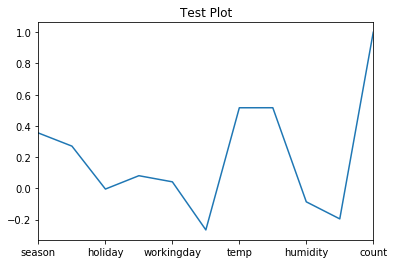

In [210]:
df.corr()['count'].plot(title="Test Plot",kind='line')

#### 5.处理离散型数据或者非数值型数据

- 我们可以看到数据的前六列均为离散变量，为了使得这些离散变量能够更好地转换为对我们有用的特征，    
我们需要对这些数据进行独热（One Hot）编码
Pandas可以通过df.get_dummies()进行转换，    
但是在转换之前，需要将对应列的数据类型转换为"category"

In [213]:
columns=df.columns.tolist()[0:6]#取离散变量
for col in columns:
    df[col]=df[col].astype('category')#转换为可以进行独热编码的数据类型
one_hot=pd.get_dummies(df)#转换为独热编码
one_hot.head()

,temp,atemp,humidity,windspeed,count,season_1.0,season_2.0,season_3.0,season_4.0,month_1.0,...,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,workingday_0.0,workingday_1.0,weather_1.0,weather_2.0,weather_3.0
0,2.0,6.0,56.2083,0.194037,3830.0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1.0,3.0,65.2917,0.350133,2114.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,36.0,37.0,56.8333,0.149883,915.0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,8.0,12.0,49.0833,0.268033,4322.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,28.0,29.0,69.7083,0.215171,6591.0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6.删除One Hot编码之后的冗余项

- 可以看到经过One Hot编码之后将每一个离散值都转换成了特征列。
但对于该编码方式而言，以season为例，season有四列，我们只需要知道前三列就足够了，    
因为如果该特征不属于这三种特征，则必然属于第四种特征，所以对于每种特征得到的结果，我们需要删除一列多余的列。

In [215]:
delete={}
for col in one_hot.columns:
    if len(col.split('_'))>1:#用'_'分割字符串，长度超过1的就是经过编码的变量
        delete[col.split('_')[0]]=col#存入字典，key为原列名，值为独热编码的最后一列
one_hot.drop(list(delete.values()),axis=1,inplace=True)
one_hot.head()

,temp,atemp,humidity,windspeed,count,season_1.0,season_2.0,month_1.0,month_2.0,month_3.0,...,month_7.0,month_8.0,month_9.0,month_10.0,day_of_week_0.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,weather_1.0
0,2.0,6.0,56.2083,0.194037,3830.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,1.0,3.0,65.2917,0.350133,2114.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,36.0,37.0,56.8333,0.149883,915.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.0,12.0,49.0833,0.268033,4322.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,28.0,29.0,69.7083,0.215171,6591.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


相关的总结到此为止，具体的源码以及数据集已经上传到了Github https://github.com/Yourdaylight/DataAnalysis.git 。